In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [50]:
img1=mpimg.imread("../test1.jpg")


In [51]:
gray1=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)


In [52]:
min_thresh=180
max_thresh=255
thresh=np.zeros_like(gray1)
thresh[(gray1>=min_thresh) & (gray1<=max_thresh)]=1

Text(0.5, 1.0, 'Threshold gray image')

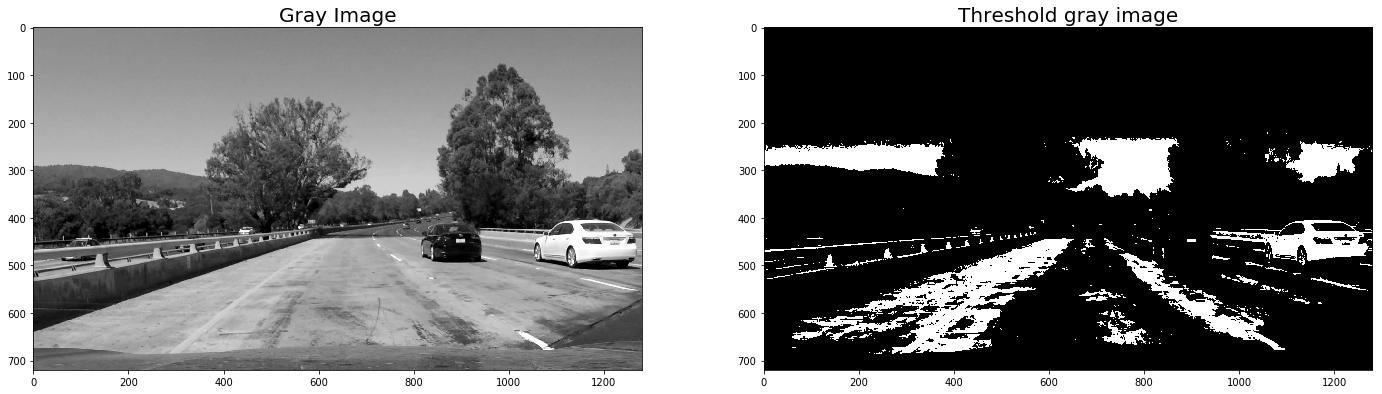

In [53]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(gray1,cmap="gray")
ax1.set_title("Gray Image",fontsize=20)
ax2.imshow(thresh,cmap="gray")
ax2.set_title("Threshold gray image",fontsize=20)


Text(0.5, 1.0, 'Blue channel')

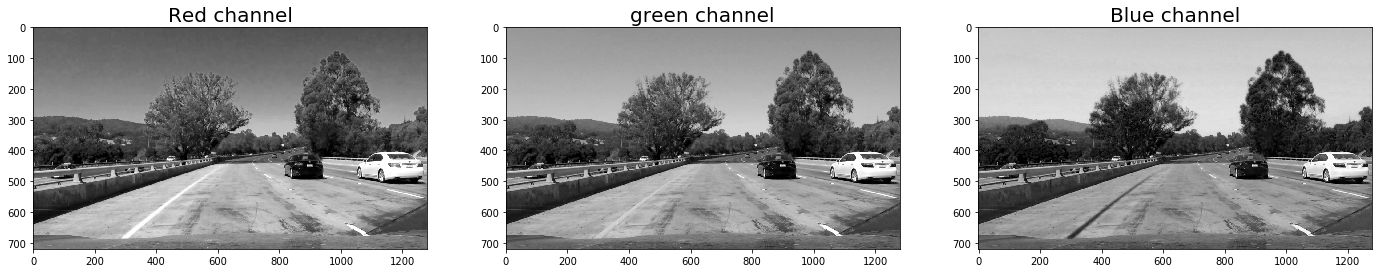

In [54]:
R=img1[:,:,0]
G=img1[:,:,1]
B=img1[:,:,2]
flag, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(24, 9))
ax1.imshow(R,cmap="gray")
ax1.set_title("Red channel",fontsize=20)
ax2.imshow(G,cmap="gray")
ax2.set_title("green channel",fontsize=20)
ax3.imshow(B,cmap="gray")
ax3.set_title("Blue channel",fontsize=20)


Text(0.5, 1.0, 'Threshold red channel')

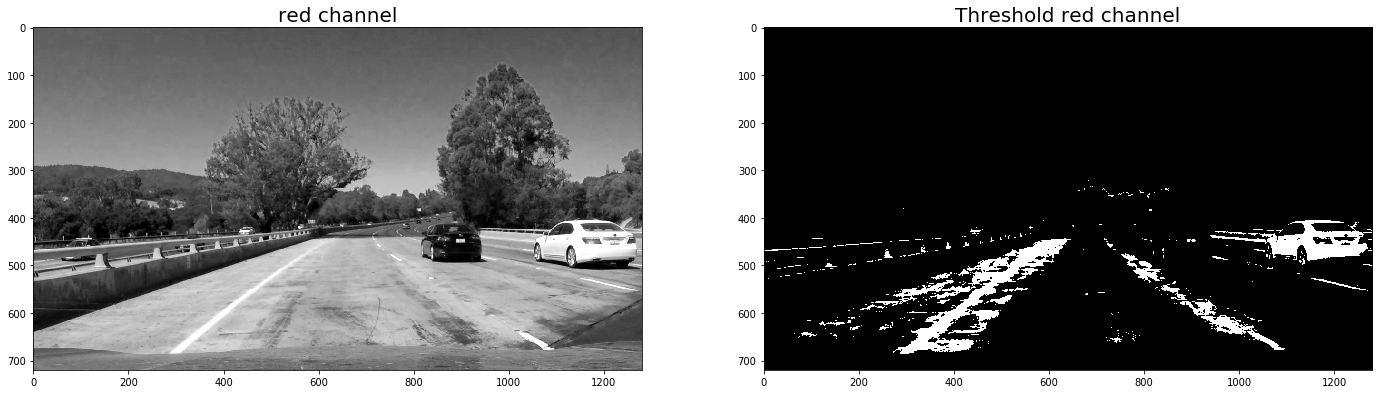

In [55]:
min_thresh=200
max_thresh=255
binary = np.zeros_like(R)
binary[(R > min_thresh) & (R <= max_thresh)] = 1
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(R,cmap="gray")
ax1.set_title("red channel",fontsize=20)
ax2.imshow(binary,cmap="gray")
ax2.set_title("Threshold red channel",fontsize=20)


Text(0.5, 1.0, 'SATURATION channel')

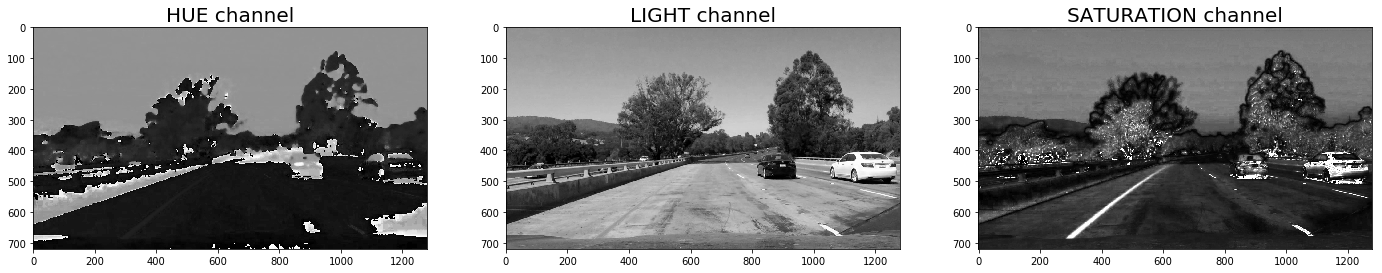

In [56]:
hls=cv2.cvtColor(img1,cv2.COLOR_RGB2HLS)
H=hls[:,:,0]
L=hls[:,:,1]
S=hls[:,:,2]
flag, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(24, 9))
ax1.imshow(H,cmap="gray")
ax1.set_title("HUE channel",fontsize=20)
ax2.imshow(L,cmap="gray")
ax2.set_title("LIGHT channel",fontsize=20)
ax3.imshow(S,cmap="gray")
ax3.set_title("SATURATION channel",fontsize=20)


Text(0.5, 1.0, 'Threshold saturation channel')

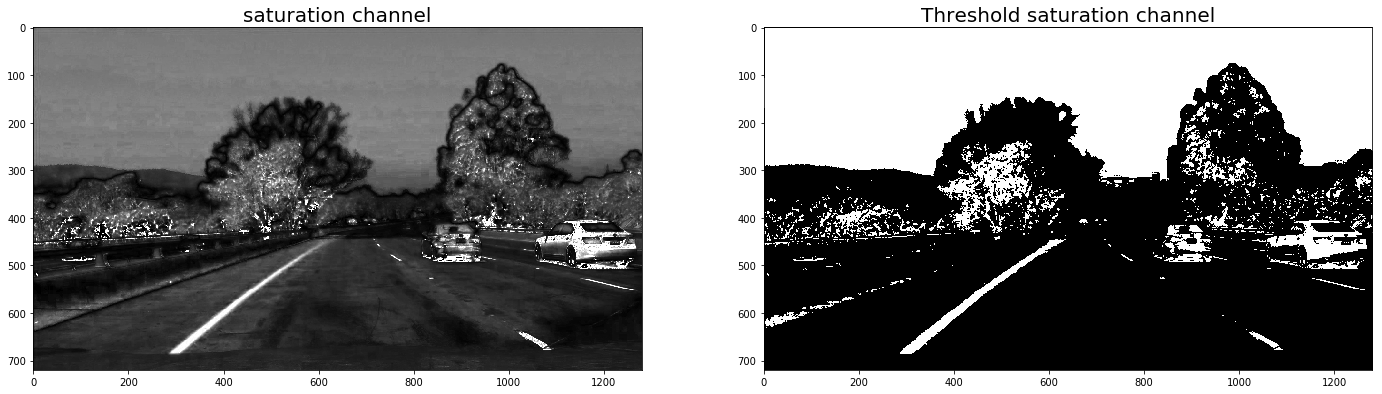

In [57]:
thresh = (90, 255)
binary = np.zeros_like(S)
binary[(S > thresh[0]) & (S <= thresh[1])] = 1
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
ax1.imshow(S,cmap="gray")
ax1.set_title("saturation channel",fontsize=20)
ax2.imshow(binary,cmap="gray")
ax2.set_title("Threshold saturation channel",fontsize=20)

In [75]:

def extract_yellow(img):
    yellow_mask=np.zeros_like(img[:,:,0])
    yellow_mask[((img[:,:,0]>=15)&(img[:,:,0]<=35))&((img[:,:,1]>=30)&(img[:,:,1]<=204))&((img[:,:,2]>=115)&(img[:,:,2]<=255))]=1
    return yellow_mask

def extract_white(img):
    white_mask=np.zeros_like(img[:,:,0])
    white_mask[((img[:,:,0]>=0)&(img[:,:,0]<=255))&((img[:,:,1]>=200)&(img[:,:,1]<=255))&((img[:,:,2]>=0)&(img[:,:,2]<=255))]=1
    return white_mask

def threshold_image(img):
    hls=cv2.cvtColor(img1,cv2.COLOR_RGB2HLS)
    yellow_mask=extract_yellow(hls)
    white_mask=extract_white(hls)
    final_mask=np.zeros_like(hls[:,:,0])
    final_mask[((white_mask==1)|(yellow_mask==1))]=1
    return final_mask    

        


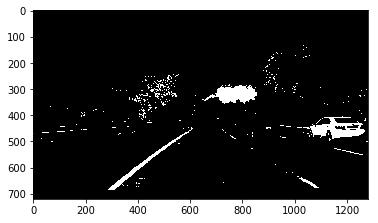

In [78]:
final_mask=threshold_image(img1)
plt.imshow(final_mask,cmap="gray")